Define train/test set from the two main principal components:


In [19]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [ ]:
Calculate the covariance matrix and its inverse, based on data in the training set:

In [20]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

We also calculate the mean value for the input variables in the training set, as this is used later to calculate the Mahalanobis distance to datapoints in the test set

In [21]:
mean_distr = data_train.mean(axis=0)


Using the covariance matrix and its inverse, we can calculate the Mahalanobis distance for the training data defining “normal conditions”, and find the threshold value to flag datapoints as an anomaly. One can then calculate the Mahalanobis distance for the datapoints in the test set, and compare that with the anomaly threshold.


In [23]:
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)


Threshold value for flagging an anomaly:

(0.0, 15)

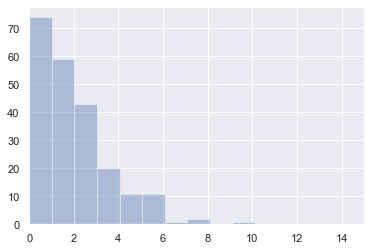

In [28]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

Then visualize the Mahalanobis distance itself:

Text(0.5, 0, 'Mahalanobis dist')

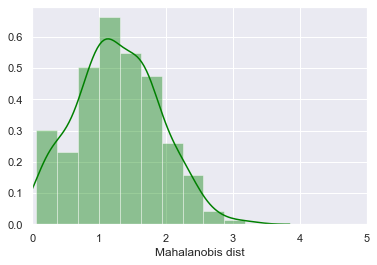

In [29]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [31]:
threshold

3.8120454918056756

From the above distributions, the calculated threshold value of 3.8 for flagging an anomaly seems reasonable (defined as 3 standard deviations from the center of the distribution)

We can then save the Mahalanobis distance, as well as the threshold value and “anomaly flag” variable for both train and test data in a dataframe:

In [34]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly

,Mob dist,Thresh,Anomaly
2004-02-13 23:52:39,1.032676,3.812045,False
2004-02-14 00:02:39,1.148163,3.812045,False
2004-02-14 00:12:39,1.509998,3.812045,False
2004-02-14 00:22:39,1.849725,3.812045,False
2004-02-14 00:32:39,0.701075,3.812045,False
...,...,...,...
2004-02-19 05:42:39,295.672654,3.812045,True
2004-02-19 05:52:39,208.319859,3.812045,True
2004-02-19 06:02:39,229.263413,3.812045,True
2004-02-19 06:12:39,105.693490,3.812045,True


In [33]:
anomaly

,Mob dist,Thresh,Anomaly
2004-02-13 23:52:39,1.032676,3.812045,False
2004-02-14 00:02:39,1.148163,3.812045,False
2004-02-14 00:12:39,1.509998,3.812045,False
2004-02-14 00:22:39,1.849725,3.812045,False
2004-02-14 00:32:39,0.701075,3.812045,False
...,...,...,...
2004-02-19 05:42:39,295.672654,3.812045,True
2004-02-19 05:52:39,208.319859,3.812045,True
2004-02-19 06:02:39,229.263413,3.812045,True
2004-02-19 06:12:39,105.693490,3.812045,True


In [35]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance.csv')


In [36]:
anomaly_alldata

,Mob dist,Thresh,Anomaly
2004-02-12 11:02:39,1.667002,3.812045,False
2004-02-12 11:12:39,1.699415,3.812045,False
2004-02-12 11:22:39,2.671968,3.812045,False
2004-02-12 11:32:39,1.424617,3.812045,False
2004-02-12 11:42:39,1.624601,3.812045,False
...,...,...,...
2004-02-19 05:42:39,295.672654,3.812045,True
2004-02-19 05:52:39,208.319859,3.812045,True
2004-02-19 06:02:39,229.263413,3.812045,True
2004-02-19 06:12:39,105.693490,3.812045,True


Verifying PCA model on test data:
Plot the calculated anomaly metric (Mob dist), and check when it crosses the anomaly threshold (note the logarithmic y-axis).

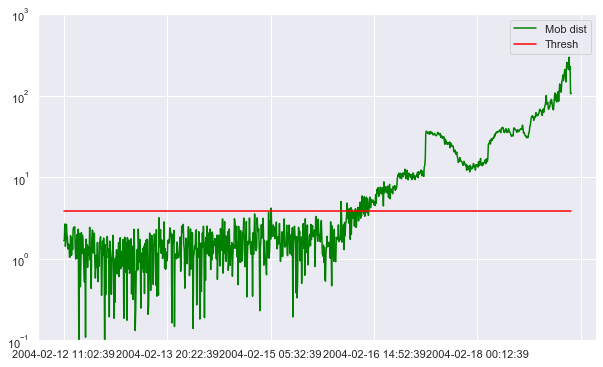

In [37]:
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])